In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.util import ngrams
from wordcloud import WordCloud
from collections import Counter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import twint
import nest_asyncio
import datetime as dt
import seaborn as sns
from textblob import TextBlob
from nltk import pos_tag
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [51]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
tweets = pd.read_csv("tweets.csv", dtype = "string")

In [205]:
tweets_data = tweets.head(500)

In [206]:
tweets_data

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. No its not a clickbait, @Qola...",Carkingga,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,<NA>,<NA>
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨 💰#Binance Spot💰 ⬇ Recommendation: #...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! Le...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,<NA>,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [207]:
tweets_data = tweets_data.drop_duplicates(subset = ["text"])
tweets_data = tweets_data.dropna(subset = ["text"])

In [33]:
def convert_to_text(dataframe):
    text = ""
    for i in dataframe['text']:
        text = text+i
    return text

In [34]:
text = convert_to_text(tweets_data)

In [66]:
def remove_links(text):
    result = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    return text

In [67]:
text = remove_links(text)

In [68]:
def remove_specialwords(text):
    filteredText=re.sub('[^A-Za-z0-9.]+', ' ',text)
    return filteredText

In [69]:
text = remove_specialwords(text)

In [43]:
def word_tokenizer(text):
    tokens = word_tokenize(text)
    return tokens

In [44]:
tokens = word_tokenize(text)

In [52]:
def remove_punct(token):
     return [word for word in token if word.isalpha()]

In [53]:
tokens = remove_punct(tokens)

In [56]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    return filtered_tokens

In [57]:
tokens = remove_stopwords(tokens)

In [60]:
def stemming(tokens):
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(words_sent) for words_sent in tokens]
    return stemmed_tokens

In [61]:
tokens = stemming(tokens)

In [64]:
def lemmetization(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_sent = [lemmatizer.lemmatize(words_sent) for words_sent in tokens]
    return lem_sent

In [65]:
tokens = lemmetization(tokens)

In [79]:
def bigrams(tokens):
    bi_grams = ngrams(tokens , 2)
    return list(bi_grams)

In [81]:
def trigrams(tokens):
    tri_grams = ngrams(tokens , 3)
    return list(tri_grams)

In [82]:
bi_grams = bigrams(tokens)

In [83]:
tri_grams = trigrams(tokens)

In [107]:
def bigrams_analysis(bi_grams):
    count_bigrams = FreqDist(bi_grams)
    dic_bigrams = dict(Counter(count_bigrams))
    return dic_bigrams  

In [108]:
def trigrams_analysis(tri_grams):
    count_trigrams = FreqDist(tri_grams)
    return dic_trigrams

In [111]:
bigrams_count = bigrams_analysis(bi_grams)
trigrams_count = trigrams_analysis(tri_grams)

In [161]:
def bigrams_analysis(bigrams):
    n = len(bigrams)
    bigrams_list = list(bigrams.items())
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if bigrams_list[j][1] < bigrams_list[j + 1][1]:
                swapped = True
                bigrams_list[j], bigrams_list[j+1] = bigrams_list[j+1] , bigrams_list[j]         
        if not swapped:
            return
    common_bigrams = []
    common_bigrams_count = []
    for i in range(10):
        common_bigrams.append(str(bigrams_list[i][0]))
        common_bigrams_count.append(bigrams_list[i][1])
    
    plt.bar(common_bigrams, common_bigrams_count, color = "blue" , width = 0.5)

In [163]:
def trigrams_analysis(trigrams):
    n = len(trigrams)
    trigrams_list = list(trigrams.items())
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if trigrams_list[j][1] < trigrams_list[j + 1][1]:
                swapped = True
                trigrams_list[j], trigrams_list[j+1] = trigrams_list[j+1] , trigrams_list[j]         
        if not swapped:
            return
    common_trigrams = []
    common_trigrams_count = []
    for i in range(10):
        common_trigrams.append(str(trigrams_list[i][0]))
        common_trigrams_count.append(trigrams_list[i][1])
    
    plt.bar(common_trigrams, common_trigrams_count, color = "blue" , width = 0.5)

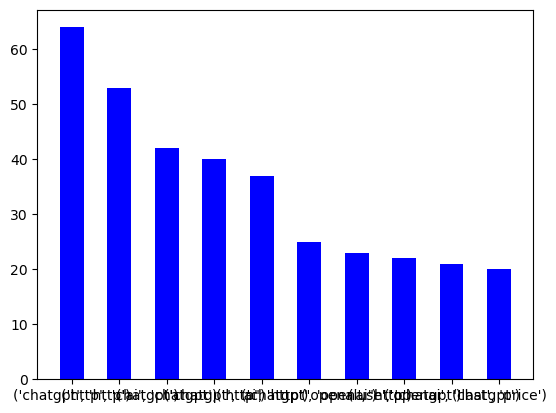

In [165]:
bigrams_analysis(bigrams_count)

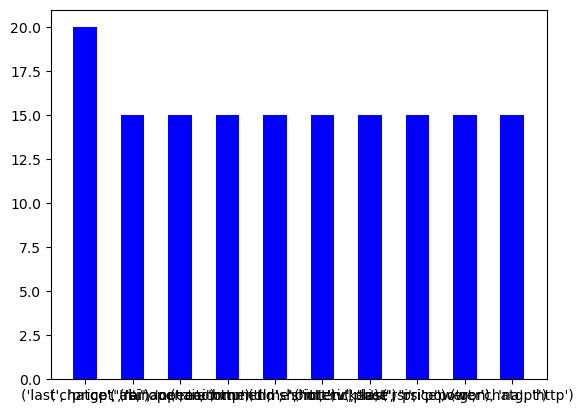

In [166]:
trigrams_analysis(trigrams_count)

In [167]:
def word_cloud(final_text):
    final_words=" ".join(str(x) for x in final_text)
    wc = WordCloud(background_color="white",max_words=200,width=800, height=400).generate(final_words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

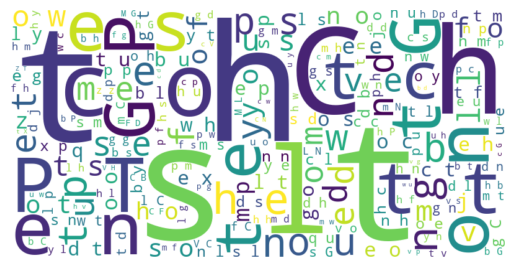

In [168]:
word_cloud(text)

In [171]:
!pip3 install scipy

In [173]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [195]:
sentiments_roberta = []
for i in tweets_data["text"]:
    tweet = i
    tweet = remove_links(tweet)
    tweet = remove_specialwords(tweet)
    encoded_tweet = tokenizer(tweet, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    negative = scores[0]
    positive = scores[1]
    neutral = scores[2]
    label = ""
    if negative > positive and negative > neutral:
        label = "negative"
    elif positive > negative and positive > neutral:
        label = "positive"
    elif neutral > positive and neutral > negative:
        label = "neutral"
    sentiments_roberta.append(label)
    


In [196]:
sentiments_textblob = []
for i in tweets_data["text"]:
    tweet = i
    tweet = remove_links(tweet)
    tweet = remove_specialwords(tweet)
    analysis = TextBlob(tweet)
    
    if analysis.sentiment[0]>0:
        label = "positive"
    elif analysis.sentiment[0]<0:
        label = "negative"
    else:
        label = "neutral"
    sentiments_textblob.append(label)

In [202]:
final_sentiments = []
for i in range(len(sentiments_roberta)):
    if sentiments_roberta[i] == sentiments_textblob[i]:
        final_sentiments.append(sentiments_textblob[i])
    else:
        final_sentiments.append(sentiments_roberta[i])
    

In [208]:
tweets_data.insert(12, "Sentiment" , final_sentiments ,True)

In [209]:
tweets_data

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,Sentiment
0,Bohmle,"#GPT4 for FREE. No its not a clickbait, @Qola...",Carkingga,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,neutral
1,<NA>,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,<NA>,<NA>,positive
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,neutral
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,neutral
4,Bitone Great,🚨Get Out!🚨 💰#Binance Spot💰 ⬇ Recommendation: #...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! Le...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,negative
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,<NA>,Hootsuite Inc.,neutral
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,neutral
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk,neutral


In [211]:
count_words = len(tokens)
print("The total number of words are : " , count_words)

The total number of words are :  8318


In [212]:
def check_space(string):
    count = 0
    for i in range(0, len(string)):
        if string[i] == " ":
            count += 1
    return count

In [213]:
count_spaces = check_space(text)

In [214]:
print("The total number of spaces are : " , count_spaces)

The total number of spaces are :  14471


In [215]:
count_characters = len(text)
print("The total number of characters are : " , count_characters)

The total number of characters are :  95109


In [219]:
def verb_finder(tokens):
    tokens_tagges = pos_tag(tokens)
    verb_count = 0
    for tagged_token in tokens_tagged:
        if tagged_token[1] == 'VB' or tagged_token[1] == 'VBD' or tagged_token[1] == 'VBG' or tagged_token[1] == 'VBN' or tagged_token[1] == 'VBP' or tagged_token[1] == 'VBZ':
            verb_count +=1
    return verb_count

In [220]:
count_verbs = verb_finder(tokens)
print("The total number of verbs are : " , count_verbs)

The total number of verbs are :  986


In [230]:
def starts_with_nameletter(tokens):
    count = 0
    for item in tokens:
        if item.startswith("A") or item.startswith("a"):
            count += 1
    return count

In [232]:
count_A = starts_with_nameletter(tokens)
print("The total number of words starting with A/a are : ", count_A)

The total number of words starting with A/a are :  840


In [234]:
sent_tokens = sent_tokenize(text)

In [235]:
count_sentence_tokens = len(sent_tokens)
print("The total number of sentence tokens are : " , count_sentence_tokens)

The total number of sentence tokens are :  366


In [236]:
specialCharCount = 0
for char in text:
    if not (char.isalnum() or char.isspace()):
        specialCharCount += 1
print("The total number of special characters are : " , specialCharCount)

The total number of special characters are :  1055


In [237]:
data = [count_sentence_tokens, count_words, count_spaces, count_characters, count_verbs, count_A, specialCharCount]

In [238]:
features_list = ["sentence length" , "word count" , "space count" , "char count" , "verb count" , "name count" , "special char count"]

In [240]:
data_ = {
    "Features" : features_list,
    "Count" : data
}

In [243]:
features = pd.DataFrame(data_)

In [244]:
features

,Features,Count
0,sentence length,366
1,word count,8318
2,space count,14471
3,char count,95109
4,verb count,986
5,name count,840
6,special char count,1055


In [246]:
tfIdf_vectorizer = TfidfVectorizer()

In [248]:
tfIdf_vectorizer.fit(tweets_data["text"])

TfidfVectorizer()

In [249]:
tfIdf_vector = tfIdf_vectorizer.transform(tweets_data['text'])

In [252]:
count_vectorizer = CountVectorizer()

In [253]:
count_vectorizer.fit(tweets_data["text"])

CountVectorizer()

In [254]:
count_vector = count_vectorizer.transform(tweets_data["text"])

In [255]:
print(count_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [258]:
w2v_model = Word2Vec(tweets_data["text"])

In [268]:
feature_extraction = tweets_data.copy()

In [274]:
feature_extraction = feature_extraction.dropna()

In [275]:
feature_extraction

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,Sentiment
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,neutral
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,neutral
4,Bitone Great,🚨Get Out!🚨 💰#Binance Spot💰 ⬇ Recommendation: #...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! Le...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,positive
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,positive
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,negative
494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,positive
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,negative
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,neutral


In [276]:
lbe = LabelEncoder()

In [277]:
for i in feature_extraction:
    feature_extraction[i] = lbe.fit_transform(feature_extraction[i])

/var/folders/k5/0hwn24qd21xbn3t2lm2hcgq00000gn/T/ipykernel_865/2538201773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_extraction[i] = lbe.fit_transform(feature_extraction[i])


In [279]:
feature_extraction = feature_extraction.drop("text" , axis = 1)

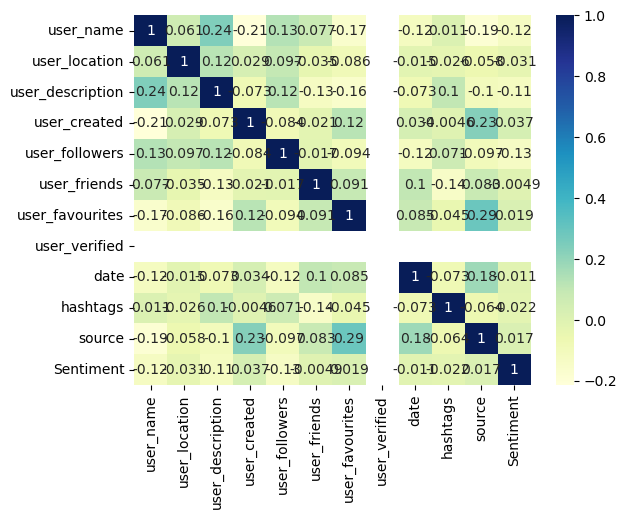

In [281]:
corr_tweets = feature_extraction.corr()
dataplot = sns.heatmap(corr_tweets, cmap="YlGnBu", annot=True)

In [290]:
model_data = tweets_data.copy()
model_data = model_data.dropna()
for i in model_data:
    model_data[i] = lbe.fit_transform(model_data[i])

In [ ]:
model_1 = RandomForestClassifier(n_estimators=200)
model_1.fit(tfIdf_vector, model_data["Sentiment"])
predictions = model_1.predict(model_data["text"])

In [ ]:
model_2 = RandomForestClassifier(n_estimators=200)
model_2.fit(count_vector, model_data["Sentiment"])
predictions = model_2.predict(model_data["text"])

In [ ]:
model_3 = RandomForestClassifier(n_estimators=200)
model_2.fit(w2v_vector, model_data["Sentiment"])
predictions = model_2.predict(model_data["text"])

In [ ]:
classifier = GaussianNB();
classifier.fit(tfIdf_vecor, model_data["Sentiment"])
y_pred = classifier.predict(model_data["text"])
cm = confusion_matrix(model_data["Sentiment"], y_pred)

In [ ]:
classifier.fit(count_vecor, model_data["Sentiment"])
y_pred = classifier.predict(model_data["text"])
cm = confusion_matrix(model_data["Sentiment"], y_pred)

In [ ]:
classifier.fit(w2v_vecor, model_data["Sentiment"])
y_pred = classifier.predict(model_data["text"])
cm = confusion_matrix(model_data["Sentiment"], y_pred)

In [ ]:
# Import various layers needed for the architecture from keras
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
# The Input layer 
sequence_input = Input(shape=(30,), dtype='int32')
# Inputs passed to the embedding layer
embedding_sequences = embedding_layer(sequence_input)
# dropout and conv layer 
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
# Passed on to the LSTM layer
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# Passed on to activation layer to get final output
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,min_lr = 0.01, monitor = 'val_loss',verbose = 1)

In [ ]:
training_tfidf = model.fit(tfIdf_vector, model_data["Sentiment"], batch_size=1024, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

In [ ]:
training = model.fit(count_vector, model_data["Sentiment"], batch_size=1024, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

In [ ]:
training = model.fit(w2v_vector, model_data["Sentiment"], batch_size=1024, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])